<a href="https://colab.research.google.com/github/kushagra1102/object-detection/blob/main/color_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import requests
from PIL import Image
import shutil
import urllib

In [10]:
import urllib.request

('images/my_image.jpg', <http.client.HTTPMessage at 0x7f2a7c16f3d0>)

In [11]:
import pandas as pd
labels_csv = pd.read_csv("/content/updated_dataset.csv")
print(labels_csv.describe())
print(labels_csv.head())

       dominant_color                                             images  \
count            1284                                               1393   
unique             34                                               1310   
top              Blue  http://assets.myntassets.com/v1/assets/images/...   
freq              182                                                  3   

                          Unnamed: 2  
count                             23  
unique                             5  
top     https://www.myntra.com/libas  
freq                              14  
  dominant_color                                             images Unnamed: 2
0          Black  http://assets.myntassets.com/v1/assets/images/...        NaN
1          Black  http://assets.myntassets.com/v1/assets/images/...        NaN
2          White  http://assets.myntassets.com/v1/assets/images/...        NaN
3           Pink  http://assets.myntassets.com/v1/assets/images/...        NaN
4         Yellow  http://asse

In [14]:
labels_csv.drop(['Unnamed: 2'],axis = 1,inplace=True)

In [15]:
labels_csv.dropna(inplace=True)

In [16]:
labels_csv['images'] = labels_csv['images'].str.strip()

In [17]:
labels_csv['images'] = labels_csv['images'].str.split("|")

In [19]:
labels_csv.head()

,dominant_color,images
0,Black,[http://assets.myntassets.com/v1/assets/images...
1,Black,[http://assets.myntassets.com/v1/assets/images...
2,White,[http://assets.myntassets.com/v1/assets/images...
3,Pink,[http://assets.myntassets.com/v1/assets/images...
4,Yellow,[http://assets.myntassets.com/v1/assets/images...


In [36]:
for i, j in labels_csv.iterrows():
    image_url = j.images[0] 
    save_name = 'images3/' + str(i) + '.jpg'
    urllib.request.urlretrieve(image_url, save_name)

In [37]:
!zip -r /content/images.zip /content/images3

  adding: content/images3/ (stored 0%)
  adding: content/images3/442.jpg (deflated 0%)
  adding: content/images3/1140.jpg (deflated 0%)
  adding: content/images3/226.jpg (deflated 0%)
  adding: content/images3/1255.jpg (deflated 1%)
  adding: content/images3/1273.jpg (deflated 4%)
  adding: content/images3/196.jpg (deflated 1%)
  adding: content/images3/780.jpg (deflated 0%)
  adding: content/images3/420.jpg (deflated 0%)
  adding: content/images3/887.jpg (deflated 1%)
  adding: content/images3/1380.jpg (deflated 1%)
  adding: content/images3/349.jpg (deflated 1%)
  adding: content/images3/942.jpg (deflated 1%)
  adding: content/images3/881.jpg (deflated 5%)
  adding: content/images3/1272.jpg (deflated 1%)
  adding: content/images3/542.jpg (deflated 1%)
  adding: content/images3/590.jpg (deflated 1%)
  adding: content/images3/879.jpg (deflated 1%)
  adding: content/images3/1200.jpg (deflated 2%)
  adding: content/images3/717.jpg (deflated 5%)
  adding: content/images3/873.jpg (deflated

In [41]:
from google.colab import files
files.download('/content/images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
labels_csv.describe()

,dominant_color,images
count,1284,1284
unique,34,1210
top,Blue,[http://assets.myntassets.com/v1/assets/images...
freq,182,3


In [40]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [43]:
train_path="/content/images3"

In [49]:
labels_csv

,dominant_color,images
0,Black,[http://assets.myntassets.com/v1/assets/images...
1,Black,[http://assets.myntassets.com/v1/assets/images...
2,White,[http://assets.myntassets.com/v1/assets/images...
3,Pink,[http://assets.myntassets.com/v1/assets/images...
4,Yellow,[http://assets.myntassets.com/v1/assets/images...
...,...,...
1388,Navy,[http://assets.myntassets.com/v1/assets/images...
1389,Pink,[http://assets.myntassets.com/v1/assets/images...
1390,Beige,[http://assets.myntassets.com/v1/assets/images...
1391,Pink,[http://assets.myntassets.com/v1/assets/images...


In [71]:
filenames = ["/content/images3/" + str(fname) + ".jpg" for fname in labels_csv.index]

In [72]:
filenames[:25]

['/content/images3/0.jpg',
 '/content/images3/1.jpg',
 '/content/images3/2.jpg',
 '/content/images3/3.jpg',
 '/content/images3/4.jpg',
 '/content/images3/5.jpg',
 '/content/images3/6.jpg',
 '/content/images3/7.jpg',
 '/content/images3/8.jpg',
 '/content/images3/9.jpg',
 '/content/images3/10.jpg',
 '/content/images3/11.jpg',
 '/content/images3/12.jpg',
 '/content/images3/13.jpg',
 '/content/images3/14.jpg',
 '/content/images3/15.jpg',
 '/content/images3/16.jpg',
 '/content/images3/17.jpg',
 '/content/images3/18.jpg',
 '/content/images3/19.jpg',
 '/content/images3/21.jpg',
 '/content/images3/22.jpg',
 '/content/images3/23.jpg',
 '/content/images3/26.jpg',
 '/content/images3/27.jpg']

In [73]:
if len(os.listdir("/content/images3/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


In [74]:
len(filenames)

1284

In [75]:
filenames[1000]

'/content/images3/1073.jpg'

In [80]:
import tensorflow as tf
import tensorflow_hub as hub

In [81]:
import numpy as np
labels = labels_csv["dominant_color"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['Black', 'Black', 'White', 'Pink', 'Yellow', 'Beige', 'Green',
       'Blue', 'Maroon', 'Orange'], dtype=object)

In [82]:
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [83]:
unique_breeds = np.unique(labels)
len(unique_breeds)

34

In [84]:
print(labels[0])
labels[0] == unique_breeds

Black


array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [85]:
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False])]

In [86]:
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs


Black
1
1
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [87]:
X = filenames
y = boolean_labels

In [136]:
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image_path, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [89]:
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [90]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [91]:
train_data = create_data_batches(X, y)

Creating training data batches...


In [92]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 34), dtype=tf.bool, name=None))

In [93]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

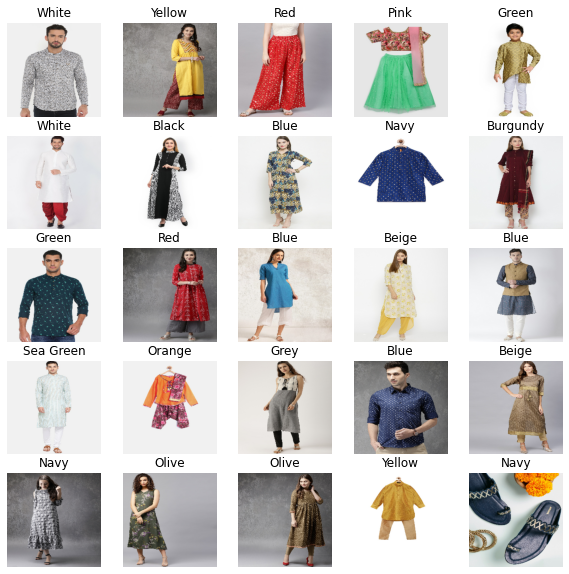

In [94]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

In [95]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [96]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [97]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 34)                34068     
                                                                 
Total params: 5,466,781
Trainable params: 34,068
Non-trainable params: 5,432,713
_________________________________________________________________


In [98]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [99]:
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU not available :(


In [101]:
NUM_EPOCHS = 20 #@param {type:"slider", min:10, max:100, step:10}

In [102]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=train_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[early_stopping])
  
  return model


In [103]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
41/41 [==============================] - 144s 3s/step - loss: 3.2206 - accuracy: 0.1690 - val_loss: 2.3056 - val_accuracy: 0.3357
Epoch 2/100
41/41 [==============================] - 132s 3s/step - loss: 2.1301 - accuracy: 0.3855 - val_loss: 1.7306 - val_accuracy: 0.4868
Epoch 3/100
41/41 [==============================] - 132s 3s/step - loss: 1.6953 - accuracy: 0.4914 - val_loss: 1.4192 - val_accuracy: 0.5927
Epoch 4/100
41/41 [==============================] - 134s 3s/step - loss: 1.4243 - accuracy: 0.5740 - val_loss: 1.2028 - val_accuracy: 0.6636
Epoch 5/100
41/41 [==============================] - 132s 3s/step - loss: 1.2296 - accuracy: 0.6433 - val_loss: 1.0370 - val_accuracy: 0.7243
Epoch 6/100
41/41 [==============================] - 132s 3s/step - loss: 1.0796 - accuracy: 0.6916 - val_loss: 0.9334 - val_accuracy: 0.7593
Epoch 7/100
41/41 [==============================] - 13

KeyboardInterrupt: ignored

In [112]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  modeldir = os.path.join("content/")
  model_path = modeldir + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [113]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [114]:
save_model(model,suffix = "color_classify")

Saving model to: content/color_classify.h5...


'content/color_classify.h5'

In [115]:
model_1000_images = load_model('drive/My Drive/Data/models/20200131-02551580439347-1000-images-Adam.h5')

Loading saved model from: /content/content/color_classify.h5


In [118]:
predictions = model.predict(train_data,verbose=1) # verbose shows us how long there is to go
predictions

41/41 [==============================] - 88s 2s/step


array([[0.01549911, 0.00233845, 0.00426912, ..., 0.00621419, 0.06000454,
        0.0059349 ],
       [0.00458862, 0.00172804, 0.00151319, ..., 0.00172075, 0.05147793,
        0.01119268],
       [0.03352898, 0.01098779, 0.01111539, ..., 0.00287375, 0.03158239,
        0.00081429],
       ...,
       [0.0132769 , 0.01116463, 0.00049563, ..., 0.00416241, 0.02324221,
        0.00020692],
       [0.00406575, 0.00527205, 0.00079899, ..., 0.00131947, 0.03762125,
        0.00107847],
       [0.00593687, 0.00627458, 0.00990905, ..., 0.00974834, 0.10657625,
        0.00304703]], dtype=float32)

In [121]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 34), dtype=tf.bool, name=None))>

In [119]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[0.01549911 0.00233845 0.00426912 0.04887501 0.00101679 0.00778659
 0.02252596 0.09249346 0.09322797 0.0066669  0.0321996  0.00513215
 0.00341003 0.02599544 0.00456131 0.03610251 0.00343651 0.02303772
 0.01685751 0.02786142 0.06341406 0.0670251  0.00460006 0.00128062
 0.02859221 0.00467468 0.00853814 0.00537511 0.00819055 0.25156888
 0.01129339 0.00621419 0.06000454 0.0059349 ]
Max value (probability of prediction): 0.25156888365745544
Sum: 0.9999999403953552
Max index: 29
Predicted label: Taupe


In [150]:
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

In [149]:
def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [151]:
x= []
x.append('/content/images3/100.jpg')
x

['/content/images3/100.jpg']

In [152]:
data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
data_batch = data.map(process_image).batch(32)

In [153]:
prediction = model.predict(data_batch)
prediction

array([[0.00791193, 0.0341369 , 0.00529595, 0.01503494, 0.00745206,
        0.01450666, 0.03153631, 0.0965206 , 0.00662169, 0.00638788,
        0.0584308 , 0.00904304, 0.0108305 , 0.16281325, 0.02048245,
        0.01913015, 0.07317558, 0.00443957, 0.01367239, 0.09494597,
        0.00766861, 0.02215812, 0.00247354, 0.00387457, 0.00245019,
        0.00180841, 0.01376046, 0.0667503 , 0.02326269, 0.05182996,
        0.00446798, 0.06906147, 0.016422  , 0.02164307]], dtype=float32)

In [146]:
unique_breeds[np.argmax(prediction)]

'Khaki'

In [128]:
len(unique_breeds)

34

In [155]:
labels_csv.to_csv("dataset.csv")